In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv('reg_dummy_skill.csv')

In [26]:
df.head(20)

,exp,skill,salary,gender
0,2.0,Java,350.0,M
1,3.0,BI,360.0,M
2,4.0,BI,400.0,M
3,5.0,ML,900.0,F
4,5.6,Java,450.0,M
5,4.6,BI,750.0,M
6,5.6,Java,450.0,F
7,7.0,Java,770.0,F
8,8.0,ML,1400.0,F
9,9.9,Java,900.0,M


In [4]:
df['salary']=df['salary']/1000



In [5]:
df.describe(include='object').T

,count,unique,top,freq
skill,34,3,Java,13
gender,34,2,M,17


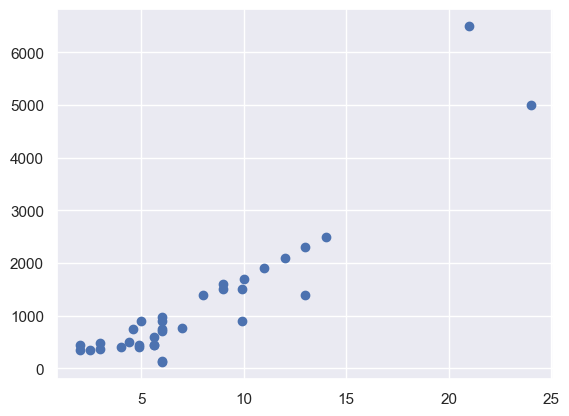

In [6]:
plt.scatter(df.exp,df.salary);

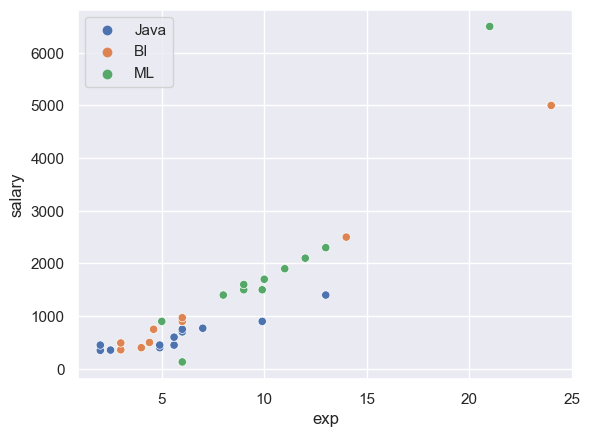

In [7]:
sns.scatterplot(x=df.exp,y=df.salary,hue=df.skill);
plt.legend(loc='upper left');


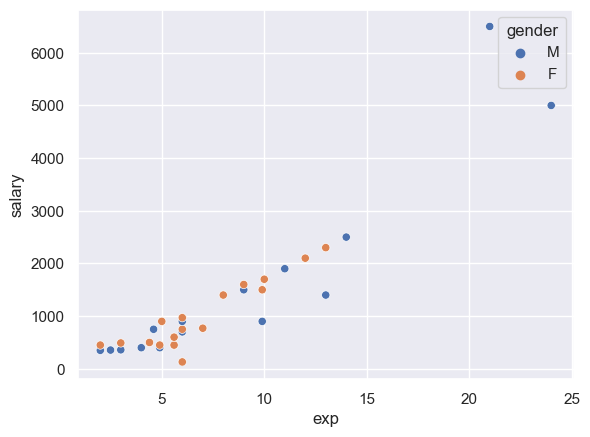

In [8]:
sns.scatterplot(x=df.exp,y=df.salary,hue=df.gender);

In [9]:
import statsmodels.api as sm

In [10]:
len(df)

34

In [11]:
df.head()

,exp,skill,salary,gender
0,2.0,Java,350.0,M
1,3.0,BI,360.0,M
2,4.0,BI,400.0,M
3,5.0,ML,900.0,F
4,5.6,Java,450.0,M


In [12]:
x1= df.iloc[:,[0,1,3]]
x1.head()

,exp,skill,gender
0,2.0,Java,M
1,3.0,BI,M
2,4.0,BI,M
3,5.0,ML,F
4,5.6,Java,M


In [13]:
y= df.iloc[:,2]
y.head()

0    350.0
1    360.0
2    400.0
3    900.0
4    450.0
Name: salary, dtype: float64

In [14]:
cat_cols=df.describe(include=['object']).columns.tolist()

In [15]:
cat_cols

['skill', 'gender']

In [16]:
x1=pd.get_dummies(x1,cat_cols,drop_first=True)

In [22]:
x1.head()

,exp,skill_Java,skill_ML,gender_M
0,2.0,1,0,1
1,3.0,0,0,1
2,4.0,0,0,1
3,5.0,0,1,0
4,5.6,1,0,1


In [20]:
X= sm.add_constant(x1)

In [21]:
X.head()

,const,exp,skill_Java,skill_ML,gender_M
0,1.0,2.0,1,0,1
1,1.0,3.0,0,0,1
2,1.0,4.0,0,0,1
3,1.0,5.0,0,1,0
4,1.0,5.6,1,0,1


In [23]:
model=sm.OLS(y,X).fit()

In [24]:
len(df)

34

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     41.78
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.23e-11
Time:                        10:46:17   Log-Likelihood:                -259.66
No. Observations:                  34   AIC:                             529.3
Df Residuals:                      29   BIC:                             536.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -535.8925    256.160     -2.092      0.045   -1059.798     -11.987
exp          239.6738     21.345     11.229      0.000     196.019     283.329
skill_Java  -243.4920    239.236     -1.018      0.317    -732.784     245.800
skill_ML     -63.3229    257.166     -0.246      0.807    -589.286     462.640
gender_M      25.9231    200.840      0.129      0.898    -384.842     436.688
==============================================================================
Omnibus:                       26.827   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.595
Skew:                           1.681   Prob(JB):                     1.27e-15
Kurtosis:                       9.093   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that most females are paid more than males then why is the P values on gender_M so high?

The females are marginally paid higher than males but we have a very few such instances where we have males and females with same experience and then there are two outliers who have high salary who are males which tilts it in males favour. *** Important note*** : If the difference between salary of males and females have been considerable higher with all othere features same then the P values would have been smaller. Right now the difference is just marginal to be statistically significant.  

### Null Hypothesis Salary of male is not different than female